In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.cluster import KMeans

# 1) Prep Data

In [43]:
# Load labeled data
df = pd.read_csv('../labeled/labeledData.csv').drop(['loc_rowid','Unnamed: 0','toi'],axis=1)
dfUl = pd.read_csv('../unlabeled/unlabledData.csv').drop(['loc_rowid','Unnamed: 0','toi'],axis=1)
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {df.columns.tolist()}")
print(f"Unlabeled Dataset shape: {dfUl.shape}")
print(f"\nUnlableld Column names: {dfUl.columns.tolist()}")

Dataset shape: (2582, 36)

Column names: ['isExoplanet', 'tid', 'ra', 'dec', 'st_pmra', 'st_pmraerr1', 'st_pmraerr2', 'st_pmdec', 'st_pmdecerr1', 'st_pmdecerr2', 'pl_tranmid', 'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_trandurh', 'pl_trandurherr1', 'pl_trandurherr2', 'pl_trandep', 'pl_trandeperr1', 'pl_trandeperr2', 'pl_rade', 'pl_insol', 'pl_eqt', 'st_tmag', 'st_tmagerr1', 'st_tmagerr2', 'st_dist', 'st_disterr1', 'st_disterr2', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_logg', 'st_rad']
Unlabeled Dataset shape: (5128, 36)

Unlableld Column names: ['isExoplanet', 'tid', 'ra', 'dec', 'st_pmra', 'st_pmraerr1', 'st_pmraerr2', 'st_pmdec', 'st_pmdecerr1', 'st_pmdecerr2', 'pl_tranmid', 'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_trandurh', 'pl_trandurherr1', 'pl_trandurherr2', 'pl_trandep', 'pl_trandeperr1', 'pl_trandeperr2', 'pl_rade', 'pl_insol', 'pl_eqt', 'st_tmag', 'st_tmagerr1', 'st_tmagerr2', 'st_d

In [44]:
dfUl.head()

,isExoplanet,tid,ra,dec,st_pmra,st_pmraerr1,st_pmraerr2,st_pmdec,st_pmdecerr1,st_pmdecerr2,...,st_tmagerr1,st_tmagerr2,st_dist,st_disterr1,st_disterr2,st_teff,st_tefferr1,st_tefferr2,st_logg,st_rad
0,PC,0.152827,0.320474,0.104587,1.0,0.008783,1.0,1.0,0.011695,1.0,...,0.011750,1.0,0.005001,1.0,1.0,0.062526,0.009521,1.0,1.0,0.029315
1,PC,0.190613,0.278278,0.150437,1.0,0.010497,1.0,1.0,0.006747,1.0,...,0.010071,1.0,0.021892,1.0,1.0,0.287241,0.006521,1.0,1.0,0.136692
2,PC,0.111557,0.685899,0.782591,1.0,0.003642,1.0,1.0,0.004498,1.0,...,0.011750,1.0,0.042018,1.0,1.0,0.171451,0.018787,1.0,1.0,0.082938
3,PC,0.142314,0.148218,0.860402,1.0,0.005570,1.0,1.0,0.008546,1.0,...,0.010071,1.0,0.037125,1.0,1.0,0.323191,0.031914,1.0,1.0,0.182037
4,PC,0.168915,0.696933,0.686517,1.0,0.001714,1.0,1.0,0.003598,1.0,...,0.013429,1.0,0.123074,1.0,1.0,0.278395,0.018787,1.0,1.0,0.161854


In [45]:
df['isExoplanet'] = df['isExoplanet'].replace({'F':0,'P':1})

/tmp/ipykernel_42283/1833471994.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['isExoplanet'] = df['isExoplanet'].replace({'F':0,'P':1})


In [46]:
# Separate features and target
X = df.drop('isExoplanet', axis=1)  
y = df['isExoplanet']  
XUl = dfUl.drop('isExoplanet',axis=1)

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nTarget distribution:\n{y.value_counts()}")

Features shape: (2582, 35)
Target shape: (2582,)

Target distribution:
isExoplanet
0    1299
1    1283
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 2) Train XG Boost Classifier

In [ ]:

xgb_classifier = XGBClassifier(
    n_estimators=100,         # Number of boosting rounds
    random_state=42,          # Random seed for reproducibility
    n_jobs=-1                 # Use all available processors
)


param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],  
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  
    'min_child_weight': [1, 2, 3, 4], 
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],  
    'n_estimators': [50, 100, 200, 300], 
}

random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_dist,
    n_iter=50, 
    scoring='accuracy',  
    cv=3,  
    verbose=2, 
    random_state=42,
    n_jobs=-1  
)

random_search.fit(X_train, y_train)

print("Best hyperparameters found: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

best_model = random_search.best_estimator_

best_model.fit(X_train, y_train)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, min_child_weight=4, n_estimators=50, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, min_child_weight=4, n_estimators=200, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, min_child_weight=4, n_estimators=200, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, min_child_weight=4, n_estimators=50, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=8, min_child_weight=2, n_estimators=300, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, min_child_weight=4, n_estimators=50, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=8, min_child_weight=2, n_estimators=300, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, ma

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.7
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:")
print(f"\nMean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


Cross-Validation Scores:

Mean Accuracy: 0.8639
Standard Deviation: 0.0094


In [50]:
#predict
y_pred = best_model.predict(X_test)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.8878

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       260
           1       0.86      0.93      0.89       257

    accuracy                           0.89       517
   macro avg       0.89      0.89      0.89       517
weighted avg       0.89      0.89      0.89       517



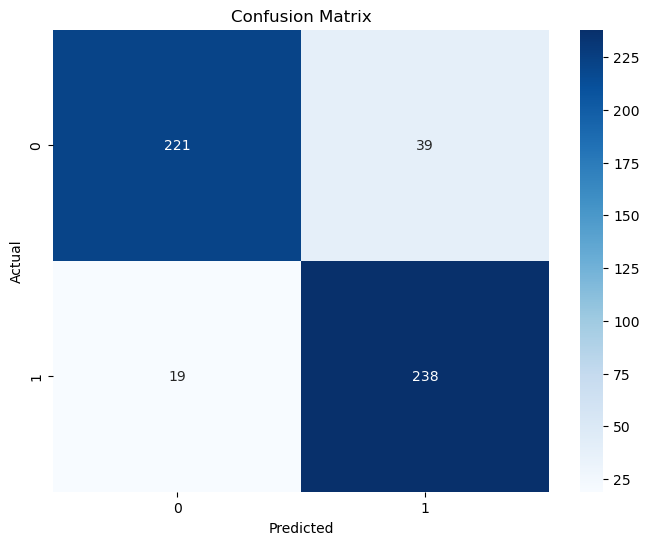

In [51]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Top 10 Most Important Features:
            feature  importance
23           pl_eqt    0.082780
22         pl_insol    0.077497
21          pl_rade    0.067858
16  pl_trandurherr1    0.058921
7      st_pmdecerr1    0.053985
13    pl_orbpererr1    0.052101
18       pl_trandep    0.047620
15      pl_trandurh    0.047102
10   pl_tranmiderr1    0.046602
27          st_dist    0.046569


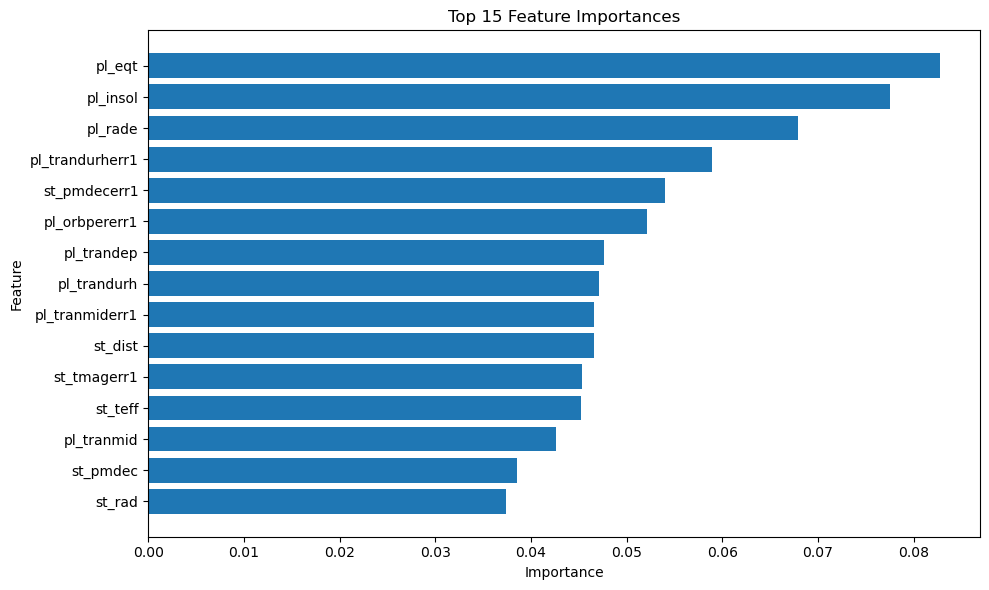

In [52]:
# Get feature importances
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

plt.figure(figsize=(10, 6))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 3) Testing Combined Unlabled and Labeled Datasets 

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42) 
kmeans.fit(XUl)

cluster_labels = kmeans.predict(XUl)

In [ ]:
nn = NearestNeighbors(n_neighbors=1)
nn.fit(X_train) 

distances, indices = nn.kneighbors(XUl)

pseudo_labels = y_train.iloc[indices.flatten()].values 


In [55]:
X_combined = np.vstack([X_train, XUl])
y_combined = np.concatenate([y_train, pseudo_labels])

In [ ]:

xgb_classifier = XGBClassifier(
    n_estimators=100,         # Number of boosting rounds
    random_state=42,          # Random seed for reproducibility
    n_jobs=-1                 # Use all available processors
)

param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],  
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  
    'min_child_weight': [1, 2, 3, 4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0], 
    'n_estimators': [50, 100, 200, 300], 
}

random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_dist,
    n_iter=50, 
    scoring='accuracy', 
    cv=3,  
    verbose=2,  
    random_state=42,
    n_jobs=-1 
)

random_search.fit(X_combined, y_combined)

print("Best hyperparameters found: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

best_model = random_search.best_estimator_

best_model.fit(X_combined, y_combined)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, min_child_weight=4, n_estimators=50, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, min_child_weight=4, n_estimators=50, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, min_child_weight=4, n_estimators=50, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, min_child_weight=4, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, min_child_weight=4, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, min_child_weight=4, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, min_child_weight=4, n_estimators=200, subsample=0.6; total time=

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,1.0
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
y_pred = best_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.8433

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.84       260
           1       0.82      0.88      0.85       257

    accuracy                           0.84       517
   macro avg       0.85      0.84      0.84       517
weighted avg       0.85      0.84      0.84       517



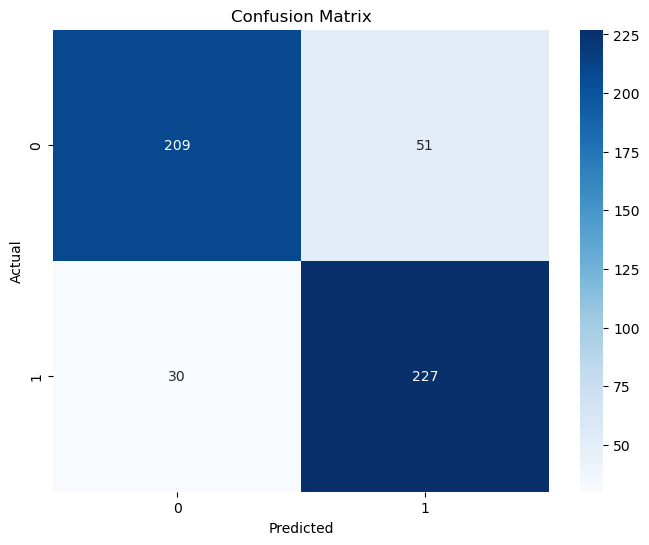

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Top 10 Most Important Features:
            feature  importance
23           pl_eqt    0.066308
22         pl_insol    0.065966
7      st_pmdecerr1    0.059764
27          st_dist    0.050083
16  pl_trandurherr1    0.049722
15      pl_trandurh    0.045113
9        pl_tranmid    0.044965
2               dec    0.044939
34           st_rad    0.043965
32      st_tefferr2    0.040576


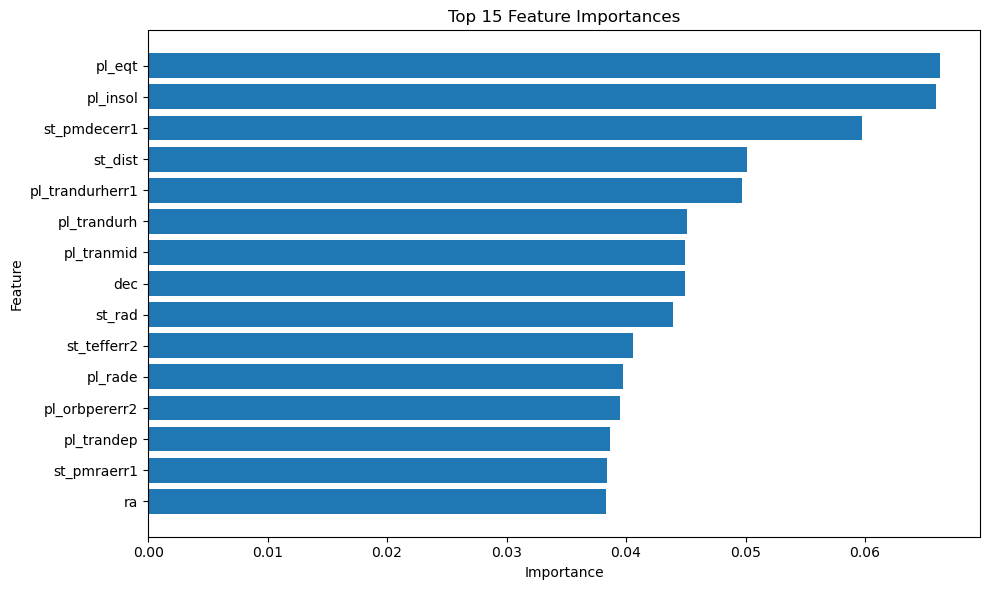

In [70]:
# Get feature importances
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

plt.figure(figsize=(10, 6))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()